## Imports

In [1]:
%matplotlib inline

import numpy as np

from happyml import datasets
from happyml.graphs import core
from happyml.graphs.optimize import SGD
from happyml.graphs.viz import graph2dot
from happyml import plot


## Loading dataset

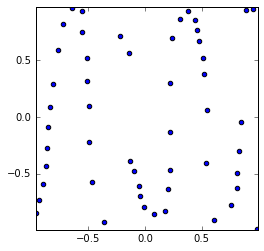

In [2]:

# Choose one of this linear regression dataset.
dataset = datasets.load("roller_coaster.csv")
#dataset = datasets.load("parabola.csv")
#dataset = datasets.load("cubic.csv")

dataset.plot()


## Create Neural Network

In [3]:

def add_layer(in_element, neurons, prefix="", activation=None):
    """Connect an in_element to a new layer and returns that layer."""
    in_dim = in_element.shape[0]
    W = core.Parameter(shape=(neurons, in_dim),
                       name="%sW" % prefix)
    b = core.Parameter(shape=(neurons,),
                       name="%sb" % prefix)
    s = W.dot(in_element) + b
    if activation is not None:
        return activation(s, name="%sReLU" % prefix)
    return s  # Linear neurons

# Build neural network computation graph.
neurons_layers = [1, 20, 20, 20, 20, 20, 20, 1]
x = core.Input(shape=(neurons_layers[0],), name="x")
layers = [x]
n_layers = len(neurons_layers)
for i in range(1, n_layers):
    last = i == n_layers - 1
    layers += [add_layer(layers[i - 1], neurons_layers[i],
                         prefix="Layer%d/" % i,
                         activation=None if last else core.ReLU)]
nn = core.ReduceSum(layers[-1])

# Define loss function.
y = core.Input(name="y")
loss = (y - nn) ** 2


## Visualizing gradient

Neural Network Architecture


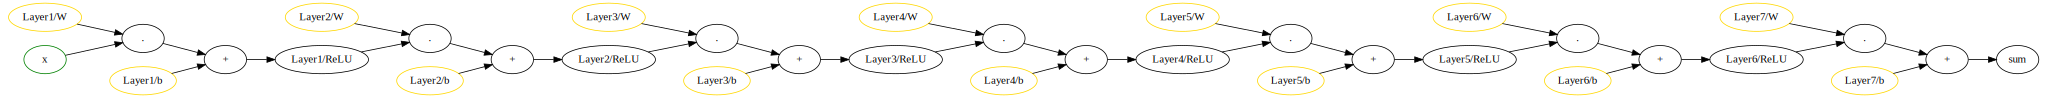

In [4]:

# Visualize graph using graphviz.
print("Neural Network Architecture")
graph2dot(nn)


## Gradient checking

In [5]:

# Check the automatic gradients computation using central difference method.
core.check_gradients(nn)
# If there is an error an exception will be raised and the next line will not be executed.
print("OK :)")


OK :)


## Train

-------------------------------------------------
Epoch: 0 	Loss: 0.432019301479
Epoch: 1 	Loss: 0.500037778682
Epoch: 2 	Loss: 0.429541877588
Epoch: 3 	Loss: 0.415396327515
Epoch: 4 	Loss: 0.429189735724
Epoch: 5 	Loss: 0.4211006071
Epoch: 6 	Loss: 0.434904289765
Epoch: 7 	Loss: 0.433582479982
Epoch: 8 	Loss: 0.419130651302
Epoch: 9 	Loss: 0.466768264186
Epoch: 10 	Loss: 0.480042592139
Epoch: 11 	Loss: 0.434176374282
Epoch: 12 	Loss: 0.466330081081
Epoch: 13 	Loss: 0.419229888118
Epoch: 14 	Loss: 0.412126308173
Epoch: 15 	Loss: 0.426910999087
Epoch: 16 	Loss: 0.452274045508
Epoch: 17 	Loss: 0.416115086018
Epoch: 18 	Loss: 0.425532634959
Epoch: 19 	Loss: 0.454679797151
Epoch: 20 	Loss: 0.490031614768
Epoch: 21 	Loss: 0.427737745515
Epoch: 22 	Loss: 0.449706907042
Epoch: 23 	Loss: 0.421759840397
Epoch: 24 	Loss: 0.426402259427
Epoch: 25 	Loss: 0.427575362159
Epoch: 26 	Loss: 0.459448521643
Epoch: 27 	Loss: 0.417133229109
Epoch: 28 	Loss: 0.415067592146
Epoch: 29 	Loss: 0.416296044951
Ep

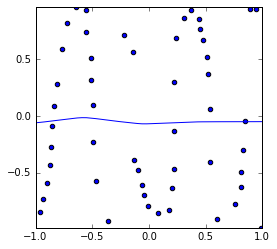

-------------------------------------------------
Epoch: 0 	Loss: 0.419296438223
Epoch: 1 	Loss: 0.418113297673
Epoch: 2 	Loss: 0.433785139253
Epoch: 3 	Loss: 0.414132310473
Epoch: 4 	Loss: 0.42218694818
Epoch: 5 	Loss: 0.417199770737
Epoch: 6 	Loss: 0.434757165683
Epoch: 7 	Loss: 0.436189499212
Epoch: 8 	Loss: 0.414906350952
Epoch: 9 	Loss: 0.408552379741
Epoch: 10 	Loss: 0.423838934333
Epoch: 11 	Loss: 0.422038905497
Epoch: 12 	Loss: 0.436565382918
Epoch: 13 	Loss: 0.413417103367
Epoch: 14 	Loss: 0.423684940565
Epoch: 15 	Loss: 0.409768019509
Epoch: 16 	Loss: 0.416064212645
Epoch: 17 	Loss: 0.407332528795
Epoch: 18 	Loss: 0.416949824825
Epoch: 19 	Loss: 0.411363030793
Epoch: 20 	Loss: 0.423684411821
Epoch: 21 	Loss: 0.426108340867
Epoch: 22 	Loss: 0.423533396034
Epoch: 23 	Loss: 0.421212115568
Epoch: 24 	Loss: 0.41260932608
Epoch: 25 	Loss: 0.425783646286
Epoch: 26 	Loss: 0.423533349079
Epoch: 27 	Loss: 0.411467754594
Epoch: 28 	Loss: 0.413803934032
Epoch: 29 	Loss: 0.40708810832
Epo

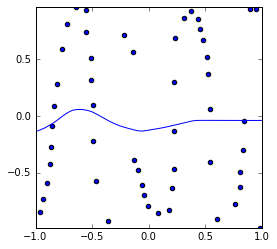

-------------------------------------------------
Epoch: 0 	Loss: 0.404211396331
Epoch: 1 	Loss: 0.389898587285
Epoch: 2 	Loss: 0.409570074729
Epoch: 3 	Loss: 0.384823760568
Epoch: 4 	Loss: 0.398453813081
Epoch: 5 	Loss: 0.418866916205
Epoch: 6 	Loss: 0.419182020243
Epoch: 7 	Loss: 0.411599267233
Epoch: 8 	Loss: 0.3800266285
Epoch: 9 	Loss: 0.425524036621
Epoch: 10 	Loss: 0.403617004463
Epoch: 11 	Loss: 0.412621925798
Epoch: 12 	Loss: 0.411344054509
Epoch: 13 	Loss: 0.373951598352
Epoch: 14 	Loss: 0.392972791602
Epoch: 15 	Loss: 0.375224458531
Epoch: 16 	Loss: 0.392181697064
Epoch: 17 	Loss: 0.381935821825
Epoch: 18 	Loss: 0.413290380333
Epoch: 19 	Loss: 0.367053456817
Epoch: 20 	Loss: 0.403140130484
Epoch: 21 	Loss: 0.359586372063
Epoch: 22 	Loss: 0.400352006293
Epoch: 23 	Loss: 0.379665993295
Epoch: 24 	Loss: 0.405490470343
Epoch: 25 	Loss: 0.376494151004
Epoch: 26 	Loss: 0.378504144158
Epoch: 27 	Loss: 0.396572648193
Epoch: 28 	Loss: 0.424893956421
Epoch: 29 	Loss: 0.372873431964
Ep

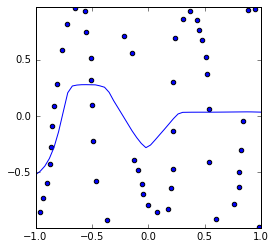

-------------------------------------------------
Epoch: 0 	Loss: 0.385460880209
Epoch: 1 	Loss: 0.365970691581
Epoch: 2 	Loss: 0.485693566963
Epoch: 3 	Loss: 0.387806426894
Epoch: 4 	Loss: 0.341094484618
Epoch: 5 	Loss: 0.353315386979
Epoch: 6 	Loss: 0.399538967129
Epoch: 7 	Loss: 0.433007970324
Epoch: 8 	Loss: 0.40443351263
Epoch: 9 	Loss: 0.401768862118
Epoch: 10 	Loss: 0.343996855189
Epoch: 11 	Loss: 0.426129426843
Epoch: 12 	Loss: 0.345369668936
Epoch: 13 	Loss: 0.410685351749
Epoch: 14 	Loss: 0.353333182534
Epoch: 15 	Loss: 0.353974571784
Epoch: 16 	Loss: 0.379768265466
Epoch: 17 	Loss: 0.376788245205
Epoch: 18 	Loss: 0.385301653818
Epoch: 19 	Loss: 0.364835733759
Epoch: 20 	Loss: 0.35473575902
Epoch: 21 	Loss: 0.349334833929
Epoch: 22 	Loss: 0.36254748069
Epoch: 23 	Loss: 0.408859319747
Epoch: 24 	Loss: 0.333749216038
Epoch: 25 	Loss: 0.352301759077
Epoch: 26 	Loss: 0.414015059693
Epoch: 27 	Loss: 0.337506638065
Epoch: 28 	Loss: 0.394207011031
Epoch: 29 	Loss: 0.361401066313
Epo

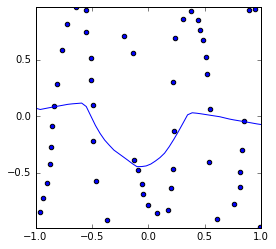

-------------------------------------------------
Epoch: 0 	Loss: 0.377918879809
Epoch: 1 	Loss: 0.392360228086
Epoch: 2 	Loss: 0.377499408932
Epoch: 3 	Loss: 0.395727149756
Epoch: 4 	Loss: 0.395257953954
Epoch: 5 	Loss: 0.395547239973
Epoch: 6 	Loss: 0.374796478488
Epoch: 7 	Loss: 0.361050235732
Epoch: 8 	Loss: 0.373254074148
Epoch: 9 	Loss: 0.370995899604
Epoch: 10 	Loss: 0.381009634132
Epoch: 11 	Loss: 0.396134243043
Epoch: 12 	Loss: 0.388794427635
Epoch: 13 	Loss: 0.368106604656
Epoch: 14 	Loss: 0.369080238234
Epoch: 15 	Loss: 0.355291477682
Epoch: 16 	Loss: 0.441370717848
Epoch: 17 	Loss: 0.374235035219
Epoch: 18 	Loss: 0.371603206388
Epoch: 19 	Loss: 0.362929392671
Epoch: 20 	Loss: 0.393421857166
Epoch: 21 	Loss: 0.36820430898
Epoch: 22 	Loss: 0.363916522438
Epoch: 23 	Loss: 0.352564324376
Epoch: 24 	Loss: 0.402374436847
Epoch: 25 	Loss: 0.339161072109
Epoch: 26 	Loss: 0.351216475483
Epoch: 27 	Loss: 0.376687772468
Epoch: 28 	Loss: 0.34287622105
Epoch: 29 	Loss: 0.40630497915
Epo

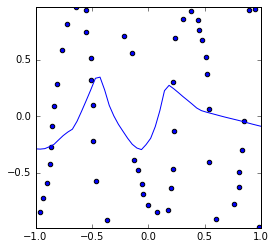

-------------------------------------------------
Epoch: 0 	Loss: 0.412093803051
Epoch: 1 	Loss: 0.349808286152
Epoch: 2 	Loss: 0.339009280983
Epoch: 3 	Loss: 0.380928154049
Epoch: 4 	Loss: 0.337830870479
Epoch: 5 	Loss: 0.331980930255
Epoch: 6 	Loss: 0.369329263798
Epoch: 7 	Loss: 0.3423587807
Epoch: 8 	Loss: 0.334181437335
Epoch: 9 	Loss: 0.372267189615
Epoch: 10 	Loss: 0.383223267905
Epoch: 11 	Loss: 0.300665676167
Epoch: 12 	Loss: 0.364890076538
Epoch: 13 	Loss: 0.382712473442
Epoch: 14 	Loss: 0.32219387829
Epoch: 15 	Loss: 0.303611130543
Epoch: 16 	Loss: 0.309031894853
Epoch: 17 	Loss: 0.374692853697
Epoch: 18 	Loss: 0.404717837917
Epoch: 19 	Loss: 0.320197449149
Epoch: 20 	Loss: 0.346866526099
Epoch: 21 	Loss: 0.391179820238
Epoch: 22 	Loss: 0.32480965103
Epoch: 23 	Loss: 0.321235143181
Epoch: 24 	Loss: 0.292884551258
Epoch: 25 	Loss: 0.333490588618
Epoch: 26 	Loss: 0.288410318083
Epoch: 27 	Loss: 0.438525390972
Epoch: 28 	Loss: 0.372918580114
Epoch: 29 	Loss: 0.304588752432
Epoc

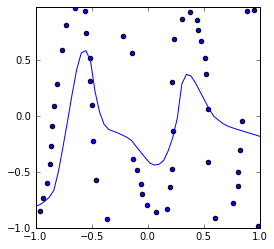

-------------------------------------------------
Epoch: 0 	Loss: 0.325550523928
Epoch: 1 	Loss: 0.302254377091
Epoch: 2 	Loss: 0.34216197932
Epoch: 3 	Loss: 0.298423118723
Epoch: 4 	Loss: 0.296710478648
Epoch: 5 	Loss: 0.28108883618
Epoch: 6 	Loss: 0.349992926862
Epoch: 7 	Loss: 0.294305828673
Epoch: 8 	Loss: 0.292331005264
Epoch: 9 	Loss: 0.298215269351
Epoch: 10 	Loss: 0.287172409953
Epoch: 11 	Loss: 0.416501678813
Epoch: 12 	Loss: 0.315471783609
Epoch: 13 	Loss: 0.29967821037
Epoch: 14 	Loss: 0.290011931624
Epoch: 15 	Loss: 0.332957903185
Epoch: 16 	Loss: 0.286754148059
Epoch: 17 	Loss: 0.32828237488
Epoch: 18 	Loss: 0.360348457914
Epoch: 19 	Loss: 0.28335200103
Epoch: 20 	Loss: 0.473558529133
Epoch: 21 	Loss: 0.338645214004
Epoch: 22 	Loss: 0.263309198981
Epoch: 23 	Loss: 0.294168179928
Epoch: 24 	Loss: 0.326526103448
Epoch: 25 	Loss: 0.315779203972
Epoch: 26 	Loss: 0.327891808822
Epoch: 27 	Loss: 0.267614596005
Epoch: 28 	Loss: 0.281039913441
Epoch: 29 	Loss: 0.368197391907
Epoch

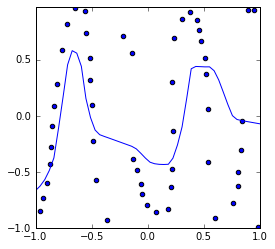

-------------------------------------------------
Epoch: 0 	Loss: 0.317312784779
Epoch: 1 	Loss: 0.267774506445
Epoch: 2 	Loss: 0.341715042309
Epoch: 3 	Loss: 0.278756653746
Epoch: 4 	Loss: 0.345956535568
Epoch: 5 	Loss: 0.283544669749
Epoch: 6 	Loss: 0.343338027418
Epoch: 7 	Loss: 0.30565865226
Epoch: 8 	Loss: 0.339116757913
Epoch: 9 	Loss: 0.292761579215
Epoch: 10 	Loss: 0.282134404646
Epoch: 11 	Loss: 0.277056763794
Epoch: 12 	Loss: 0.248874787709
Epoch: 13 	Loss: 0.234530948667
Epoch: 14 	Loss: 0.368824396493
Epoch: 15 	Loss: 0.274183653178
Epoch: 16 	Loss: 0.358631639712
Epoch: 17 	Loss: 0.350487446929
Epoch: 18 	Loss: 0.281924873527
Epoch: 19 	Loss: 0.353075299253
Epoch: 20 	Loss: 0.333552012781
Epoch: 21 	Loss: 0.333352948423
Epoch: 22 	Loss: 0.285828638533
Epoch: 23 	Loss: 0.302648939779
Epoch: 24 	Loss: 0.28483266515
Epoch: 25 	Loss: 0.240653326164
Epoch: 26 	Loss: 0.313009151189
Epoch: 27 	Loss: 0.315023964594
Epoch: 28 	Loss: 0.30925098099
Epoch: 29 	Loss: 0.322552502169
Epo

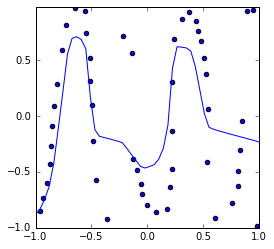

-------------------------------------------------
Epoch: 0 	Loss: 0.228410353647
Epoch: 1 	Loss: 0.368722486309
Epoch: 2 	Loss: 0.29879799691
Epoch: 3 	Loss: 0.351018135601
Epoch: 4 	Loss: 0.246850752918
Epoch: 5 	Loss: 0.377792765507
Epoch: 6 	Loss: 0.267479780579
Epoch: 7 	Loss: 0.244984853041
Epoch: 8 	Loss: 0.276811983394
Epoch: 9 	Loss: 0.258535059931
Epoch: 10 	Loss: 0.2508893565
Epoch: 11 	Loss: 0.296907038118
Epoch: 12 	Loss: 0.237027833745
Epoch: 13 	Loss: 0.261056612
Epoch: 14 	Loss: 0.345131847924
Epoch: 15 	Loss: 0.292235806902
Epoch: 16 	Loss: 0.426962295531
Epoch: 17 	Loss: 0.362233693422
Epoch: 18 	Loss: 0.327053296657
Epoch: 19 	Loss: 0.330429016101
Epoch: 20 	Loss: 0.27850850632
Epoch: 21 	Loss: 0.294503005267
Epoch: 22 	Loss: 0.258861804531
Epoch: 23 	Loss: 0.323645899525
Epoch: 24 	Loss: 0.284036928115
Epoch: 25 	Loss: 0.282383138562
Epoch: 26 	Loss: 0.345742553129
Epoch: 27 	Loss: 0.325231202269
Epoch: 28 	Loss: 0.310529247892
Epoch: 29 	Loss: 0.295303615731
Epoch: 

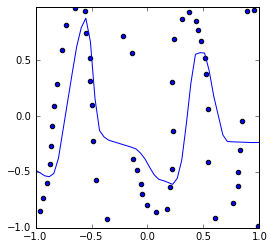

-------------------------------------------------
Epoch: 0 	Loss: 0.385570657016
Epoch: 1 	Loss: 0.301488288749
Epoch: 2 	Loss: 0.263853401623
Epoch: 3 	Loss: 0.278298071673
Epoch: 4 	Loss: 0.216524655893
Epoch: 5 	Loss: 0.248507645315
Epoch: 6 	Loss: 0.382574009183
Epoch: 7 	Loss: 0.2394427209
Epoch: 8 	Loss: 0.311457137025
Epoch: 9 	Loss: 0.235085825145
Epoch: 10 	Loss: 0.325035596234
Epoch: 11 	Loss: 0.391589636538
Epoch: 12 	Loss: 0.313008886466
Epoch: 13 	Loss: 0.365199478221
Epoch: 14 	Loss: 0.3046425301
Epoch: 15 	Loss: 0.303040411477
Epoch: 16 	Loss: 0.335406751677
Epoch: 17 	Loss: 0.234738409422
Epoch: 18 	Loss: 0.244697634422
Epoch: 19 	Loss: 0.271396076465
Epoch: 20 	Loss: 0.246219044939
Epoch: 21 	Loss: 0.240798544956
Epoch: 22 	Loss: 0.309216437758
Epoch: 23 	Loss: 0.224877097622
Epoch: 24 	Loss: 0.212840751377
Epoch: 25 	Loss: 0.335179817794
Epoch: 26 	Loss: 0.275393073874
Epoch: 27 	Loss: 0.201112963928
Epoch: 28 	Loss: 0.358156527179
Epoch: 29 	Loss: 0.205752495157
Epoc

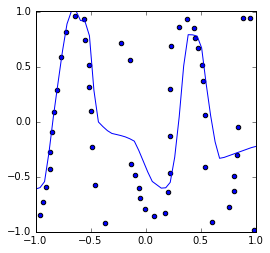

In [6]:

model = nn.to_model()
optimizer = SGD(learning_rate=0.01)
i = 0
while i < 10:
    optimizer.minimize(loss, dataset,
                       feed={"x": x, "y": y},
                       epochs=50,
                       batch_size=10)
    model.plot(plot_type="line")
    dataset.plot()
    plot.show()
    i += 1
